In [1]:
#Slide-seqV2 comparison to Visium

In [2]:
#load libraries
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import datetime

now = datetime.datetime.now()
import scipy.optimize
import scipy.stats
import os

%pylab inline

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches

import scanpy as sc

Populating the interactive namespace from numpy and matplotlib


In [5]:
##########if you are using jilongs pipeline you want to use this method for loading the data
#point this to the output directory with the expression matrix
dge_path = "/broad/macosko/data/libraries/2020-02-21_Puck_200115_08/GRCm38.81.exonic+intronic/alignment/Puck_200115_08.digital_expression.txt.gz"
dge = pd.read_csv(dge_path, header = 0, engine = 'python', sep = '\t')

In [6]:
dge
dge = dge.T


In [7]:
dge.columns = dge.iloc[0]

In [8]:
dge = dge.drop(dge.index[0])

In [9]:
dge.index.name = 'barcode'

In [11]:
#coordinate files come as two separate files now
#point this to the barcode matching directory
coords_barcodes = pd.read_csv("/broad/macosko/data/libraries/2020-02-21_Puck_200115_08/GRCm38.81.exonic+intronic/barcode_matching/Puck_200115_08_matched_bead_barcodes.txt",header = None)
coords_locations = pd.read_csv("/broad/macosko/data/libraries/2020-02-21_Puck_200115_08/GRCm38.81.exonic+intronic/barcode_matching/Puck_200115_08_matched_bead_locations.txt", sep = '\t', header = None)


In [12]:
coords = coords_locations[[1,2]]
coords.set_axis(['xcoord','ycoord'], axis=1, inplace=True)
coords['barcode'] = coords_barcodes
coords.set_index('barcode')

xcoord  ycoord
barcode                        
AACGTCATAATCGT   888.95  3219.5
TACTTTAGCGCAGT  4762.20  5020.4
CATGCCTGGGTTCG   886.50  3199.6
TCGATATGGCACAA  2237.10  5144.6
TTATCTGACGAAGC  1031.80  2425.2
...                 ...     ...
ACAATACAGATACT  3025.50  5516.0
GGTCAGGTTAACGT  3069.70  3211.9
CATTATGGAATTCT  3507.10  2811.0
GACTTTTCTTAAAG  2155.00  1264.3
GTCAATAAAGGGCG  4819.70  2476.7

[53208 rows x 2 columns]

(53208,)
(53208, 4)


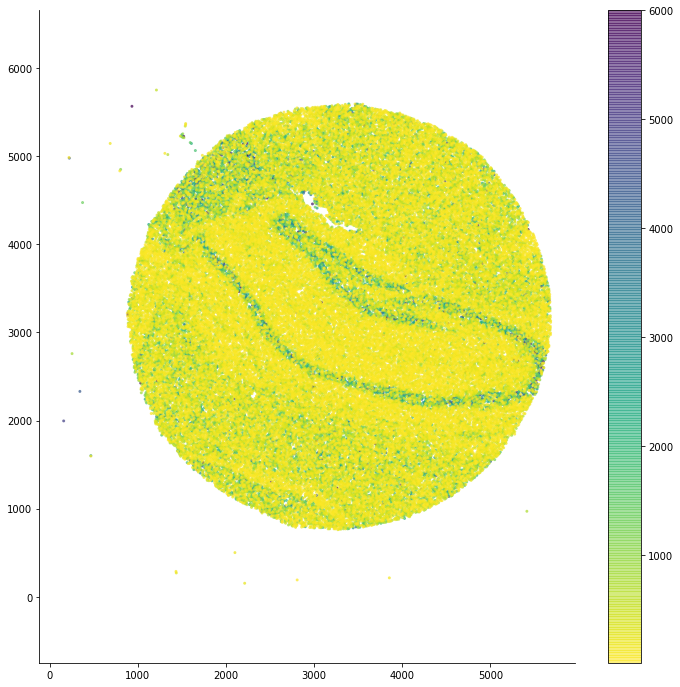

In [15]:
counts_gr0_barcodestotals = dge.to_numpy().sum(axis=1)
print(counts_gr0_barcodestotals.shape)
coords['total_counts'] = counts_gr0_barcodestotals
print(coords.shape)
coords.head(5)
plt.figure(figsize = (12,12))
plt.set_cmap('viridis_r')
plt.scatter(coords['xcoord'], coords['ycoord'], c=coords['total_counts'], s=4, alpha=0.6, vmax=6000);
plt.axis('equal');
plt.colorbar();
plt.show();






['Hpca', 'Slc17a7', 'Ociad2', 'Atp2b1', 'Prox1', 'Ttr', 'Sepw1']


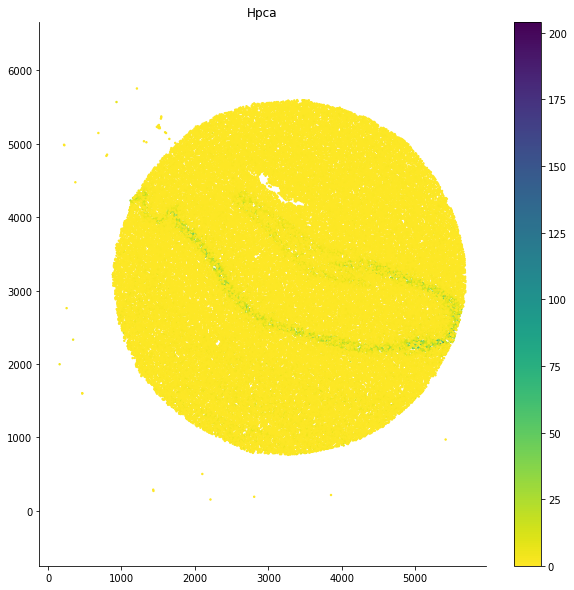

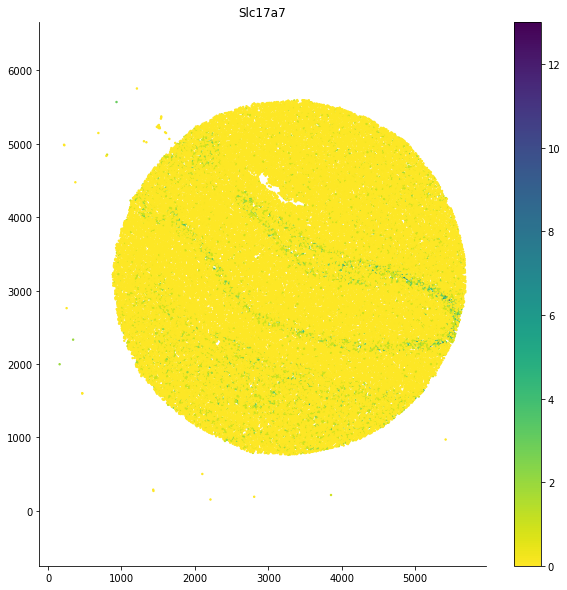

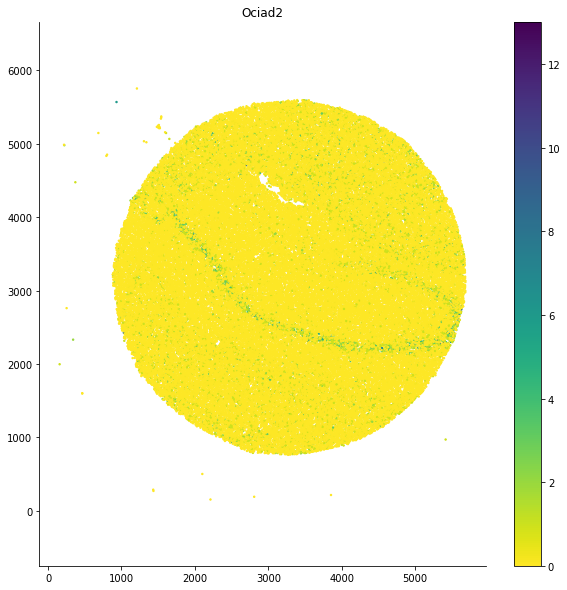

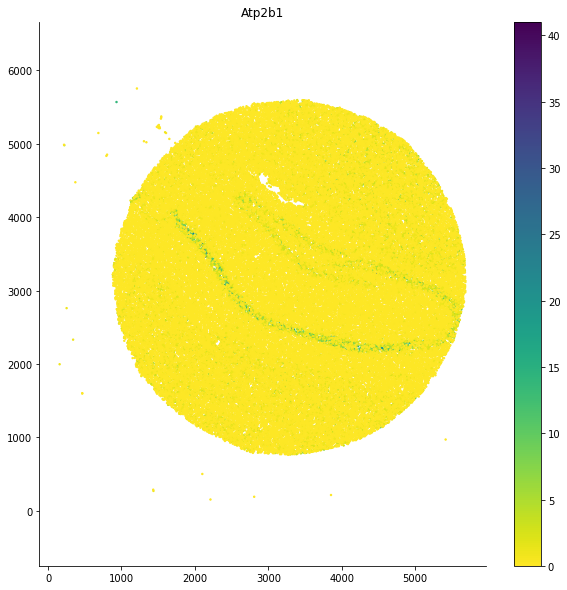

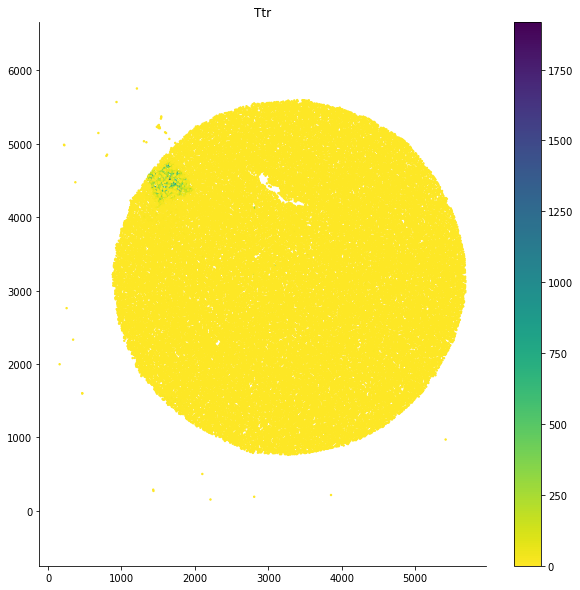

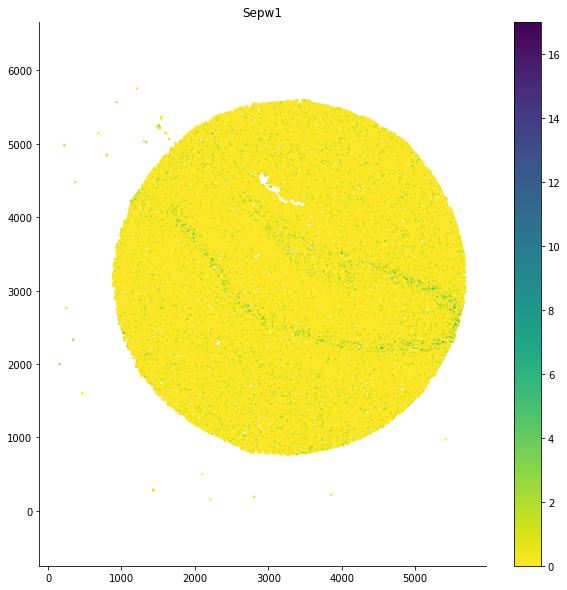

In [17]:
def plot_one_gene(gene):
    figsize(10, 10)
    pyplot.set_cmap('viridis_r')
    plt.scatter(coords['xcoord'], coords['ycoord'], c=dge[gene], s=2, alpha=1)
    plt.axis('equal')
    plt.vmin = 0
    plt.title('{}'.format(gene))
    plt.colorbar();
    #save_result(gene)
    plt.show()
    
#interesting_genes = ['VIM','EPCAM','OLFM4','SLC12A2','LEFTY1','DCN','CFP','LUM']
interesting_genes = ['Hpca','Slc17a7', 'Ociad2', 'Atp2b1','Prox1','Ttr','Sepw1']
print(interesting_genes)
for g in interesting_genes:
    plot_one_gene(gene=g)

In [18]:
#plotting aggregated features on pucks
    #total counts 
    #gene list
#generate the aggregate features
x_min = np.min(coords.xcoord)
x_max = np.max(coords.xcoord)
y_min = np.min(coords.ycoord)
y_max = np.max(coords.ycoord)
pixperbin = {10: 15.41, 20: 30.81, 40: 61.63, 100:154.08, 110: 169.49}



In [19]:
coords.index= coords['barcode']

In [20]:
coords

xcoord  ycoord         barcode total_counts
barcode                                                     
AACGTCATAATCGT   888.95  3219.5  AACGTCATAATCGT        23772
TACTTTAGCGCAGT  4762.20  5020.4  TACTTTAGCGCAGT        19661
CATGCCTGGGTTCG   886.50  3199.6  CATGCCTGGGTTCG        15999
TCGATATGGCACAA  2237.10  5144.6  TCGATATGGCACAA        15069
TTATCTGACGAAGC  1031.80  2425.2  TTATCTGACGAAGC        14013
...                 ...     ...             ...          ...
ACAATACAGATACT  3025.50  5516.0  ACAATACAGATACT           10
GGTCAGGTTAACGT  3069.70  3211.9  GGTCAGGTTAACGT           10
CATTATGGAATTCT  3507.10  2811.0  CATTATGGAATTCT           10
GACTTTTCTTAAAG  2155.00  1264.3  GACTTTTCTTAAAG           10
GTCAATAAAGGGCG  4819.70  2476.7  GTCAATAAAGGGCG           10

[53208 rows x 4 columns]

In [21]:
dge = dge.loc[coords.index]

In [22]:
coords = coords.drop(['barcode'],axis=1)

In [23]:
coords

xcoord  ycoord total_counts
barcode                                     
AACGTCATAATCGT   888.95  3219.5        23772
TACTTTAGCGCAGT  4762.20  5020.4        19661
CATGCCTGGGTTCG   886.50  3199.6        15999
TCGATATGGCACAA  2237.10  5144.6        15069
TTATCTGACGAAGC  1031.80  2425.2        14013
...                 ...     ...          ...
ACAATACAGATACT  3025.50  5516.0           10
GGTCAGGTTAACGT  3069.70  3211.9           10
CATTATGGAATTCT  3507.10  2811.0           10
GACTTTTCTTAAAG  2155.00  1264.3           10
GTCAATAAAGGGCG  4819.70  2476.7           10

[53208 rows x 3 columns]

In [24]:
#100um feature size
xbins100 = np.arange(x_min, x_max, step = pixperbin[110])
ybins100 = np.arange(y_min, y_max, step = pixperbin[110])
# get centers for new coords
xcoords100 = xbins100 + pixperbin[110]/2.
ycoords100 = ybins100 + pixperbin[110]/2.

# add final coordinate so next step works properly
np.append(xbins100, x_max)
np.append(ybins100, y_max)

coords100 = coords.copy()
coords100['new_x'] = coords100.apply(lambda row: xcoords100[(np.argmax(xbins100 > row['xcoord'])-1)] , axis=1)
coords100['new_y'] = coords100.apply(lambda row: ycoords100[(np.argmax(ybins100 > row['ycoord'])-1)] , axis=1)
# should be false for both
print(any(np.isnan(coords100.new_y)))
print(any(np.isnan(coords100.new_x)))
# call each bin by its whole num coords
coords100['group'] = coords100.apply(lambda row: '{}_{}'.format(int(floor(row.new_x)), 
                                                              int(floor(row.new_y))), axis = 1)
counts_for100 = dge.copy()                                                    

False
False


In [25]:
counts_for100['group'] = list(map(str,coords100['group']))

In [28]:
counts100 = counts_for100.groupby('group').sum()
counts100.reset_index(inplace=True)
#counts100.rename(columns = {'group':'barcode'}, inplace=True)
print(counts100.shape)
counts100.head()    

(701, 23265)


GENE      group  0610005C13Rik  0610007P14Rik  0610009B22Rik  0610009E02Rik  \
0     1089_2103              0              0              0              0   
1     1089_2272              0              2              1              0   
2     1089_2442              0              4              1              0   
3     1089_2611              0              4              1              0   
4     1089_2781              1              3              1              0   

GENE  0610009L18Rik  0610009O20Rik  0610010F05Rik  0610010K14Rik  \
0                 0              0              0              0   
1                 0              2              3              0   
2                 0              3              2              0   
3                 0              2              2              0   
4                 1              3             13              0   

GENE  0610011F06Rik  ...  mt-Tq  mt-Tr  mt-Ts2  mt-Tt  mt-Tv  n-R5-8s1  \
0                 0  ...      0      0       0      0      0         0   
1                 1  ...      0      0       2      0      4         1   
2                 3  ...      1      0       2      0      4         0   
3                 3  ...      1      0       1      0      3         0   
4                 2  ...      0      0       0      0      2         1   

GENE  n-R5s173  n-R5s33  n-R5s40  n-R5s95  
0            0        0        0        0  
1            0        0        0        0  
2            0        0        0        0  
3            0        0        0        0  
4            0        0        0        0  

[5 rows x 23265 columns]

In [29]:
coords100_clean = coords100.drop_duplicates(subset=['new_x', 'new_y', 'group'])[['group','new_x', 'new_y']]
coords100_clean.rename(columns = {'group':'group','new_x': 'x', 'new_y':'y'}, inplace=True)
print(shape(coords100_clean))
coords100_final = pd.merge(counts100, coords100_clean, left_on='group', right_on='group')
coords100_final = coords100_final[['group', 'x', 'y']]
coords100 = coords100_final.copy()
print(coords100.shape)
coords100.head()

(701, 3)
(701, 3)


group         x         y
0  1089_2103  1089.415  2103.095
1  1089_2272  1089.415  2272.585
2  1089_2442  1089.415  2442.075
3  1089_2611  1089.415  2611.565
4  1089_2781  1089.415  2781.055

In [30]:
coords100

group         x         y
0    1089_2103  1089.415  2103.095
1    1089_2272  1089.415  2272.585
2    1089_2442  1089.415  2442.075
3    1089_2611  1089.415  2611.565
4    1089_2781  1089.415  2781.055
..         ...       ...       ...
696   919_3289   919.925  3289.525
697   919_3459   919.925  3459.015
698   919_3628   919.925  3628.505
699   919_3797   919.925  3797.995
700   919_5492   919.925  5492.895

[701 rows x 3 columns]

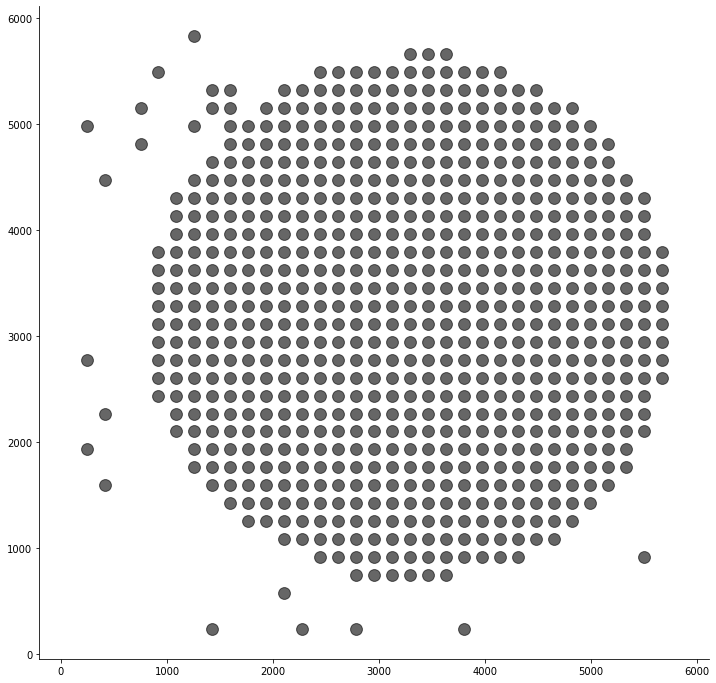

In [31]:
figsize(12, 12)
plt.scatter(coords100['x'], coords100['y'], c='k', s=140, alpha=0.6);
plt.axis('equal');
#save_result("tissue_coverage_100")

['Hpca', 'Ociad2', 'Slc17a7', 'Atp2b1', 'Wfs1', 'Ttr']


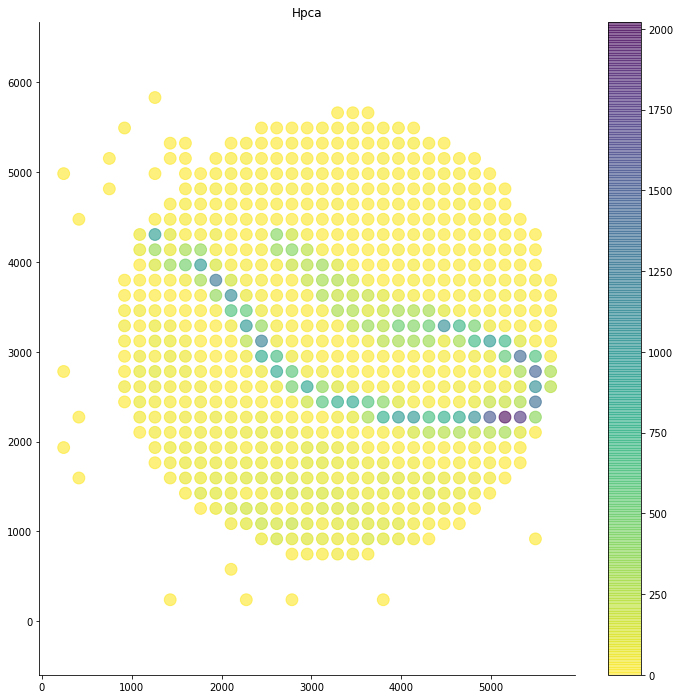

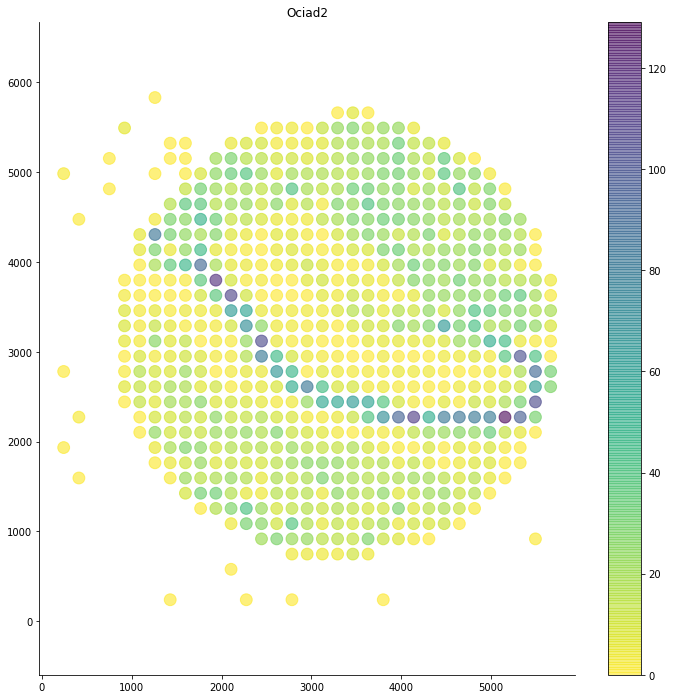

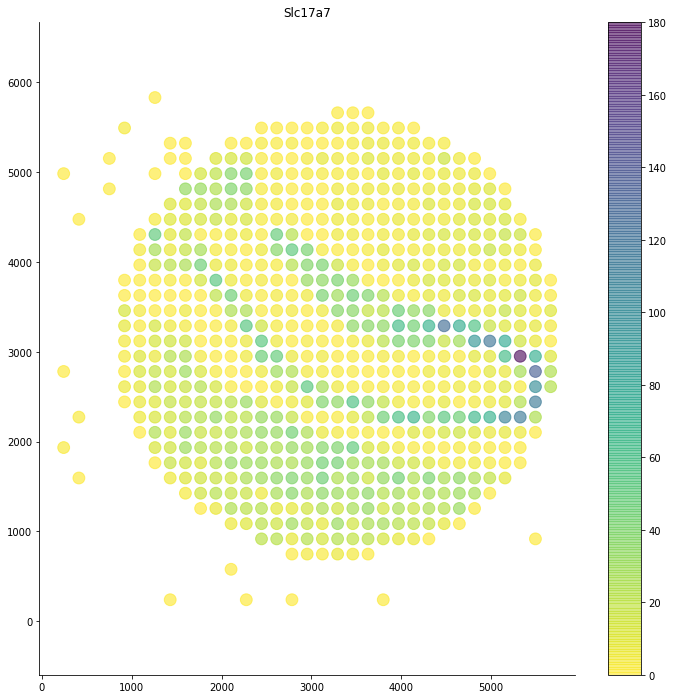

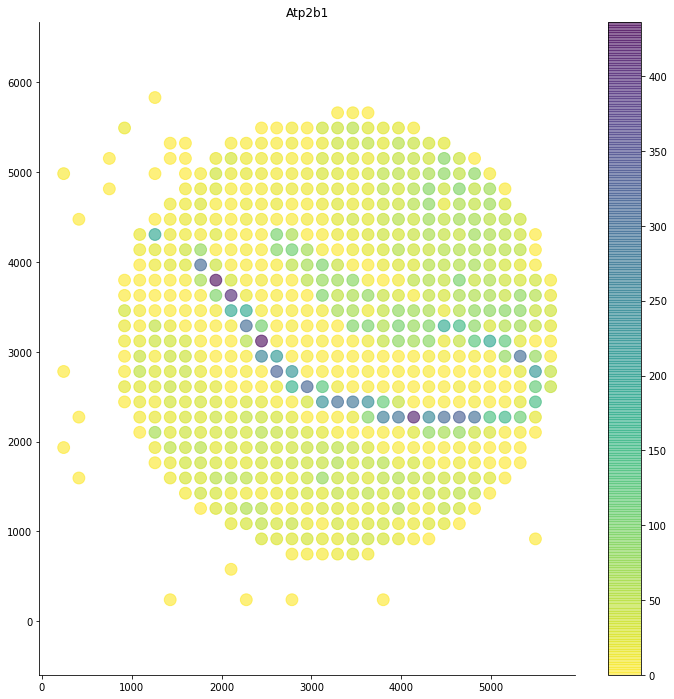

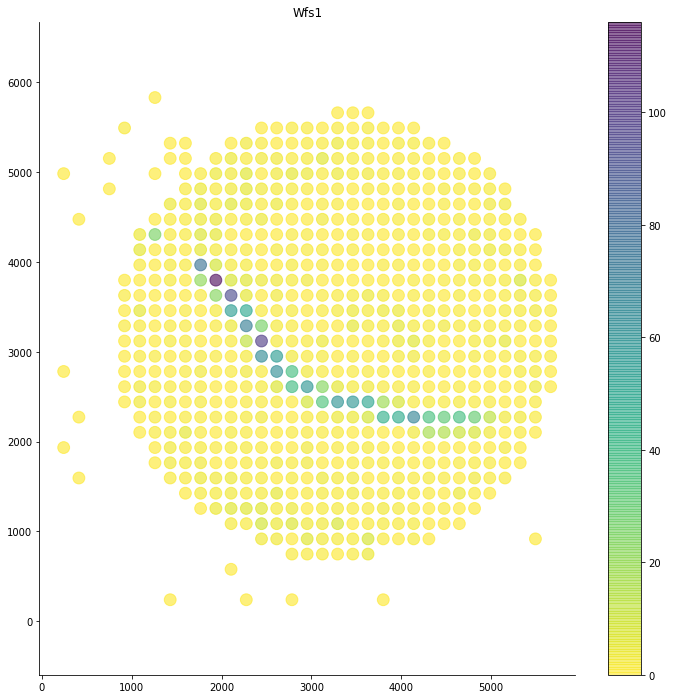

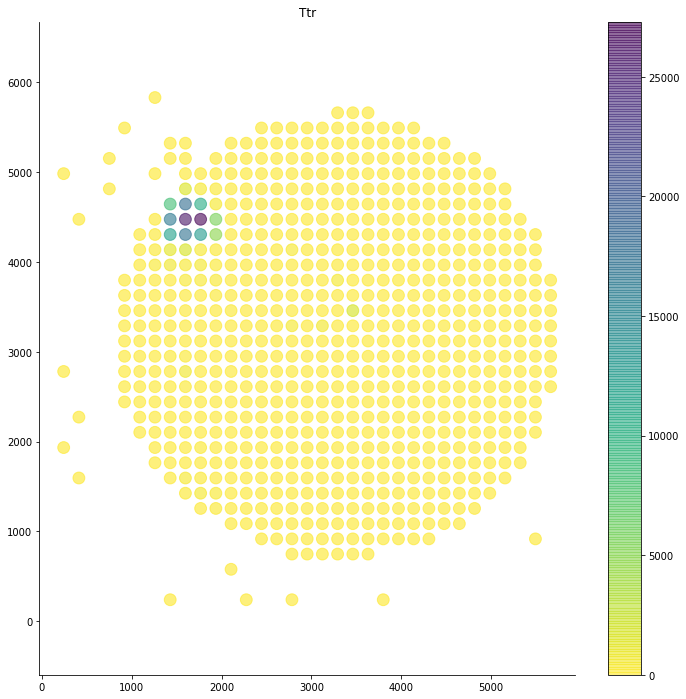

In [32]:
def plot_one_gene_100(gene):
    figsize(12, 12)
    pyplot.set_cmap('viridis_r')
    plt.scatter(coords100['x'], coords100['y'], c=counts100[gene], s=140, alpha=0.6)
    plt.axis('equal')
    plt.title('{}'.format(gene))
    plt.colorbar();
    plt.show()

#interesting_genes = ['VIM','EPCAM','OLFM4','SLC12A2','LEFTY1','DCN','CFP','LUM']

interesting_genes = ['Hpca','Ociad2','Slc17a7','Atp2b1','Wfs1', 'Ttr']
print(interesting_genes)
for g in interesting_genes:
    plot_one_gene_100(gene=g)

In [35]:
coords = coords.query('(xcoord-3200)*(xcoord-3200)+(ycoord-3300)*(ycoord-3300)<=2500*2500')


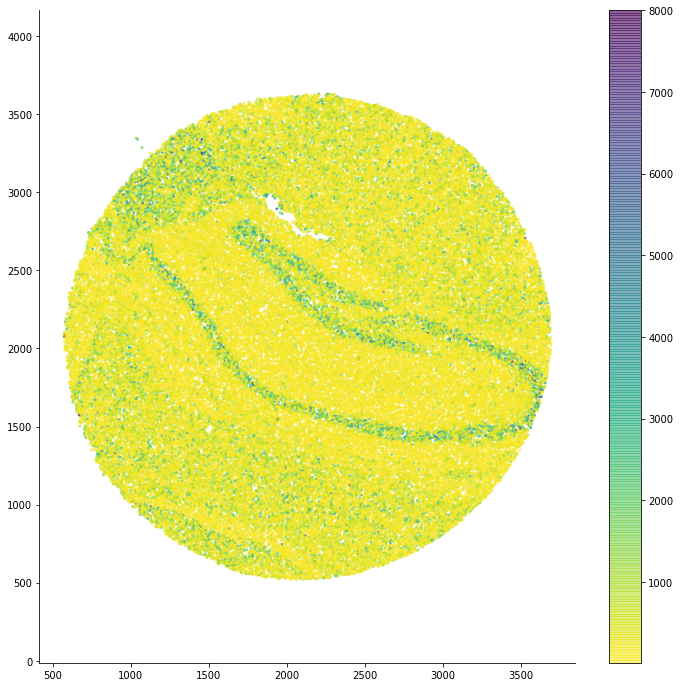

In [36]:
plt.figure(figsize = (12,12))
plt.set_cmap('viridis_r')
plt.scatter(coords['xcoord']*0.649, coords['ycoord']*0.649, c=coords['total_counts'], s=4, alpha=0.6, vmax=8000);
plt.axis('equal');
plt.colorbar();
#plt.savefig("{}/slideseq.pdf".format("/broad/macosko/bstickels/data/slideseq/slideseq/slideseqv2/visium_data/figures"), dpi = 200)
plt.show();

(701,)
(701, 4)


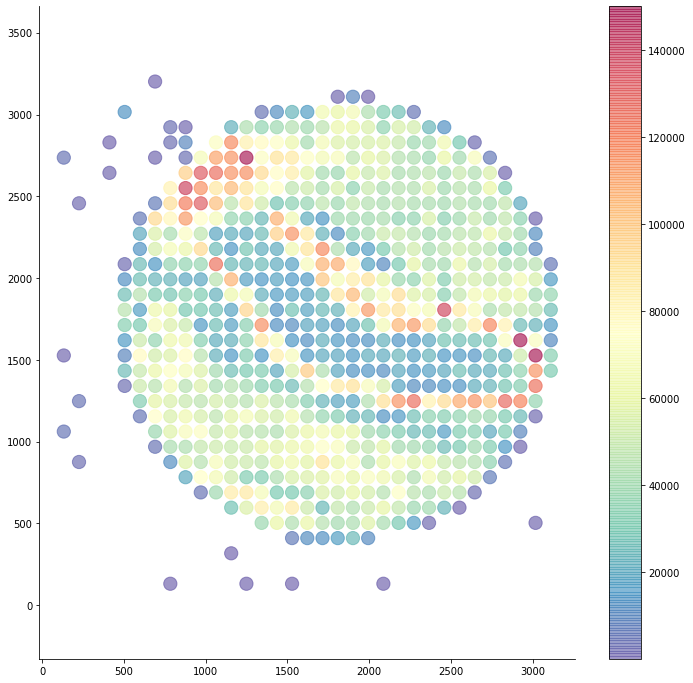

In [37]:
counts_gr0_barcodestotals = np.sum(counts100.drop('group', axis=1), axis=1)
print(counts_gr0_barcodestotals.shape)
coords100['total_counts'] = counts_gr0_barcodestotals
print(coords100.shape)
coords100.head(5)
plt.figure(figsize = (12, 12))
plt.set_cmap('Spectral_r')
plt.scatter(coords100['x']*0.549, coords100['y']*0.549, c=coords100['total_counts'], s=175, alpha=0.6,vmax=150000);
plt.axis('equal');
plt.colorbar();
#plt.savefig("{}/100um_slideseq.svg".format("/broad/macosko/bstickels/data/slideseq/slideseq/slideseqv2/visium_data/figures"), dpi = 200)
plt.show();

In [38]:
counts100

GENE      group  0610005C13Rik  0610007P14Rik  0610009B22Rik  0610009E02Rik  \
0     1089_2103              0              0              0              0   
1     1089_2272              0              2              1              0   
2     1089_2442              0              4              1              0   
3     1089_2611              0              4              1              0   
4     1089_2781              1              3              1              0   
..          ...            ...            ...            ...            ...   
696    919_3289              0              2              1              0   
697    919_3459              0              0              0              1   
698    919_3628              0              0              1              0   
699    919_3797              0              0              0              0   
700    919_5492              0              2              2              0   

GENE  0610009L18Rik  0610009O20Rik  0610010F05Rik  0610010K14Rik  \
0                 0              0              0              0   
1                 0              2              3              0   
2                 0              3              2              0   
3                 0              2              2              0   
4                 1              3             13              0   
..              ...            ...            ...            ...   
696               0              2              3              0   
697               0              2              2              0   
698               0              0              0              0   
699               0              0              0              0   
700               1              1              0              0   

GENE  0610011F06Rik  ...  mt-Tq  mt-Tr  mt-Ts2  mt-Tt  mt-Tv  n-R5-8s1  \
0                 0  ...      0      0       0      0      0         0   
1                 1  ...      0      0       2      0      4         1   
2                 3  ...      1      0       2      0      4         0   
3                 3  ...      1      0       1      0      3         0   
4                 2  ...      0      0       0      0      2         1   
..              ...  ...    ...    ...     ...    ...    ...       ...   
696               9  ...      0      0       1      0      2         0   
697               1  ...      2      0       0      0      0         2   
698               2  ...      0      0       0      0      1         0   
699               0  ...      0      0       0      0      0         0   
700               2  ...      0      1       0      0      0         0   

GENE  n-R5s173  n-R5s33  n-R5s40  n-R5s95  
0            0        0        0        0  
1            0        0        0        0  
2            0        0        0        0  
3            0        0        0        0  
4            0        0        0        0  
..         ...      ...      ...      ...  
696          0        0        0        0  
697          0        0        0        0  
698          0        0        0        0  
699          0        0        0        0  
700          0        0        0        0  

[701 rows x 23265 columns]

In [39]:
np.mean(coords100["total_counts"])

46093.23823109843

In [40]:
######################
#here we are going to load the 10X visium data to compare to Slide-seqV2 with some basic plots

import csv
import gzip
import os
import scipy.io
import pandas as pd
import numpy as np

In [41]:
matrix_dir = "/broad/macosko/bstickels/data/slideseq/slideseq/slideseqv2/visium_data/filtered_feature_bc_matrix/"
mat = scipy.io.mmread(os.path.join(matrix_dir, "matrix.mtx"))




In [42]:
mat
mat = pd.DataFrame(mat.toarray())

In [44]:
#here need to load the gene information as well as the barcodes list for the gene expression coordinate
#first load the barcodes
barcodes = pd.read_csv("/broad/macosko/bstickels/data/slideseq/slideseq/slideseqv2/visium_data/filtered_feature_bc_matrix/barcodes.tsv", sep="\t", header=None)
#next load the gene names
gene_list = pd.read_csv("/broad/macosko/bstickels/data/slideseq/slideseq/slideseqv2/visium_data/filtered_feature_bc_matrix/features.tsv", sep="\t", header = None)

In [45]:
#now to load the spatial coordinates and the gene names and barcodes to get the plotting working
coordinates = pd.read_csv("/broad/macosko/bstickels/data/slideseq/slideseq/slideseqv2/visium_data/spatial/tissue_positions_list.csv", header = None)

In [46]:
#now lets combine features from each of these to make the final expression matrix

mat = mat.set_index(gene_list.iloc[:,1])
mat = mat.rename(barcodes.iloc[:,0], axis = 1)
mat = mat.transpose()

In [47]:
#we need to make a coordinates file that has only the ones from the filtered DGE for the matrix
coordinates.set_index(coordinates.iloc[:,0])

0  1   2    3      4     5
0                                                              
ACGCCTGACACGCGCT-1  ACGCCTGACACGCGCT-1  0   0    0   1252  1211
TACCGATCCAACACTT-1  TACCGATCCAACACTT-1  0   1    1   1372  1280
ATTAAAGCGGACGAGC-1  ATTAAAGCGGACGAGC-1  0   0    2   1252  1349
GATAAGGGACGATTAG-1  GATAAGGGACGATTAG-1  0   1    3   1372  1418
GTGCAAATCACCAATA-1  GTGCAAATCACCAATA-1  0   0    4   1252  1486
...                                ... ..  ..  ...    ...   ...
GAACGTTTGTATCCAC-1  GAACGTTTGTATCCAC-1  0  77  123  10470  9675
ATTGAATTCCCTGTAG-1  ATTGAATTCCCTGTAG-1  0  76  124  10350  9744
TACCTCACCAATTGTA-1  TACCTCACCAATTGTA-1  0  77  125  10470  9812
AGTCGAATTAGCGTAA-1  AGTCGAATTAGCGTAA-1  0  76  126  10350  9881
TTGAAGTGCATCTACA-1  TTGAAGTGCATCTACA-1  0  77  127  10470  9950

[4992 rows x 6 columns]

In [48]:
filtered_coordinates = coordinates[[4,5]]
filtered_coordinates

4     5
0      1252  1211
1      1372  1280
2      1252  1349
3      1372  1418
4      1252  1486
...     ...   ...
4987  10470  9675
4988  10350  9744
4989  10470  9812
4990  10350  9881
4991  10470  9950

[4992 rows x 2 columns]

In [49]:
filtered_coordinates.set_axis(['xcoord','ycoord'], axis=1, inplace=True)
filtered_coordinates = filtered_coordinates.set_index(coordinates.iloc[:,0])
filtered_coordinates.rename_axis("barcode")

xcoord  ycoord
barcode                           
ACGCCTGACACGCGCT-1    1252    1211
TACCGATCCAACACTT-1    1372    1280
ATTAAAGCGGACGAGC-1    1252    1349
GATAAGGGACGATTAG-1    1372    1418
GTGCAAATCACCAATA-1    1252    1486
...                    ...     ...
GAACGTTTGTATCCAC-1   10470    9675
ATTGAATTCCCTGTAG-1   10350    9744
TACCTCACCAATTGTA-1   10470    9812
AGTCGAATTAGCGTAA-1   10350    9881
TTGAAGTGCATCTACA-1   10470    9950

[4992 rows x 2 columns]

In [50]:
mat.rename_axis("barcode")

1                   Xkr4  Gm1992  Gm37381  Rp1  Sox17  Gm37323  Mrpl15  \
barcode                                                                  
AAACAAGTATCTCCCA-1     0       0        0    0      0        0       1   
AAACAATCTACTAGCA-1     0       0        0    0      0        0       1   
AAACACCAATAACTGC-1     0       0        0    0      0        0       0   
AAACAGAGCGACTCCT-1     0       0        0    0      0        0       0   
AAACCGGGTAGGTACC-1     0       0        0    0      0        0       2   
...                  ...     ...      ...  ...    ...      ...     ...   
TTGTTGTGTGTCAAGA-1     0       0        0    0      0        0       1   
TTGTTTCACATCCAGG-1     0       0        0    0      1        0       1   
TTGTTTCATTAGTCTA-1     0       0        0    0      0        0       0   
TTGTTTCCATACAACT-1     1       0        0    0      0        0       1   
TTGTTTGTGTAAATTC-1     0       0        0    0      0        0       4   

1                   Lypla1  Gm37988  Tcea1  ...  AC125149.1  AC125149.2  \
barcode                                     ...                           
AAACAAGTATCTCCCA-1       1        0      2  ...           0           0   
AAACAATCTACTAGCA-1       1        0      1  ...           0           0   
AAACACCAATAACTGC-1       0        0      2  ...           0           0   
AAACAGAGCGACTCCT-1       0        0      0  ...           0           0   
AAACCGGGTAGGTACC-1       0        0      1  ...           0           0   
...                    ...      ...    ...  ...         ...         ...   
TTGTTGTGTGTCAAGA-1       0        0      3  ...           0           0   
TTGTTTCACATCCAGG-1       0        0      2  ...           0           0   
TTGTTTCATTAGTCTA-1       0        0      0  ...           0           0   
TTGTTTCCATACAACT-1       1        0      0  ...           0           0   
TTGTTTGTGTAAATTC-1       0        0      0  ...           0           0   

1                   AC125149.4  AC234645.1  AC168977.2  AC168977.1  \
barcode                                                              
AAACAAGTATCTCCCA-1           0           0           0           0   
AAACAATCTACTAGCA-1           0           0           0           0   
AAACACCAATAACTGC-1           0           0           0           0   
AAACAGAGCGACTCCT-1           0           0           0           0   
AAACCGGGTAGGTACC-1           0           0           0           0   
...                        ...         ...         ...         ...   
TTGTTGTGTGTCAAGA-1           0           0           0           0   
TTGTTTCACATCCAGG-1           0           0           0           0   
TTGTTTCATTAGTCTA-1           0           0           0           0   
TTGTTTCCATACAACT-1           0           0           0           0   
TTGTTTGTGTAAATTC-1           0           0           0           0   

1                   AC149090.1  CAAA01118383.1  Vmn2r122  CAAA01147332.1  
barcode                                                                   
AAACAAGTATCTCCCA-1           3               0         0               0  
AAACAATCTACTAGCA-1           1               0         0               0  
AAACACCAATAACTGC-1           2               0         0               0  
AAACAGAGCGACTCCT-1           3               1         0               0  
AAACCGGGTAGGTACC-1           4               0         0               0  
...                        ...             ...       ...             ...  
TTGTTGTGTGTCAAGA-1           3               3         0               0  
TTGTTTCACATCCAGG-1           3               0         0               0  
TTGTTTCATTAGTCTA-1           4               2         0               0  
TTGTTTCCATACAACT-1           3               1         0               0  
TTGTTTGTGTAAATTC-1           6               0         0               0  

[2698 rows x 31053 columns]

In [51]:
filtered_coordinates = filtered_coordinates.loc[filtered_coordinates.index & mat.index]

In [52]:
filtered_coordinates.rename_axis("barcode")

xcoord  ycoord
barcode                           
CACATAAGGCGACCGT-1    1371    3206
ATACGCCGATCTACCG-1    1371    3344
ACTTATCTGATCTATA-1    1252    3413
TCTGTGACTGACCGTT-1    1611    2794
CTAGCAACTAATTTAC-1    1491    3138
...                    ...     ...
TTCTCAATTGCTACAA-1    9871    2175
CCCTCAGATCGAGAAC-1    9871    3001
CTATGAACACCTTGCC-1    9871    3138
TCGACATAGCGTAGCG-1    9871    3276
CTCGAGGCAAGTTTCA-1    9871    3414

[2698 rows x 2 columns]

In [53]:
counts_visium = np.sum(mat, axis=1)
print(counts_visium.shape)
filtered_coordinates['total_counts'] = counts_visium

(2698,)


In [54]:
filtered_coordinates

xcoord  ycoord  total_counts
CACATAAGGCGACCGT-1    1371    3206         31059
ATACGCCGATCTACCG-1    1371    3344         32595
ACTTATCTGATCTATA-1    1252    3413         23097
TCTGTGACTGACCGTT-1    1611    2794         19401
CTAGCAACTAATTTAC-1    1491    3138         24483
...                    ...     ...           ...
TTCTCAATTGCTACAA-1    9871    2175         38171
CCCTCAGATCGAGAAC-1    9871    3001         29426
CTATGAACACCTTGCC-1    9871    3138         31078
TCGACATAGCGTAGCG-1    9871    3276         28118
CTCGAGGCAAGTTTCA-1    9871    3414         16255

[2698 rows x 3 columns]

In [55]:
np.mean(filtered_coordinates["total_counts"])

29965.08598962194

In [56]:
 hippocampus_coordinates = filtered_coordinates[(filtered_coordinates['xcoord'] > 2900) & (filtered_coordinates['xcoord'] < 5100) & (filtered_coordinates['ycoord'] > 3000) & (filtered_coordinates['ycoord'] < 6000)]

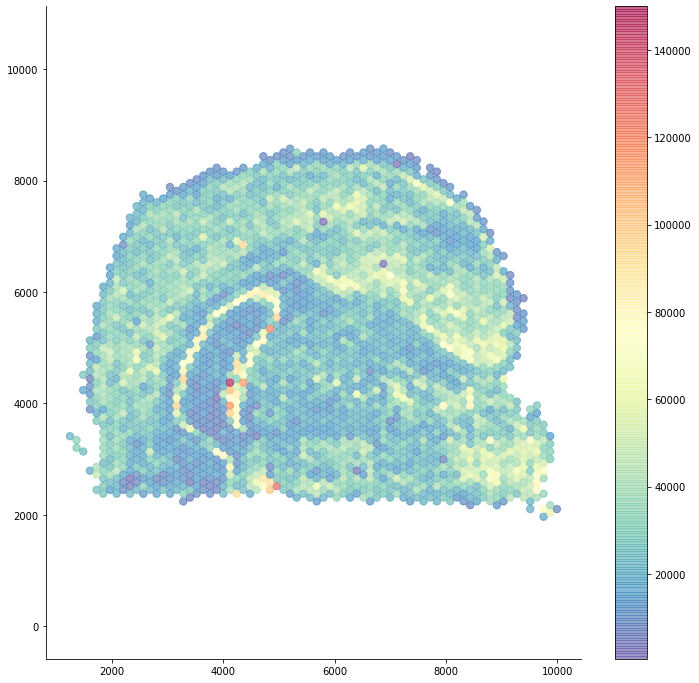

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 12))
plt.set_cmap('Spectral_r')
plt.scatter(filtered_coordinates['xcoord'], filtered_coordinates['ycoord'], c=filtered_coordinates['total_counts'], s=55, alpha=0.6, vmax = 150000);
plt.axis('equal');
plt.colorbar();
plt.savefig("{}/visium.svg".format("/broad/macosko/bstickels/data/slideseq/slideseq/slideseqv2/visium_data/figures"), dpi = 200)
plt.show();

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 12))
plt.set_cmap('Spectral_r')
plt.scatter(hippocampus_coordinates['xcoord'], hippocampus_coordinates['ycoord'], c=hippocampus_coordinates['total_counts'], s=250, alpha=0.6, vmax = 150000);
plt.axis('equal');
plt.colorbar();
plt.savefig("{}/visium_cropped.svg".format("/broad/macosko/bstickels/data/slideseq/slideseq/slideseqv2/visium_data/figures"), dpi = 200)
plt.show();

In [59]:
np.mean(hippocampus_coordinates['total_counts'])

27952.085784313724

/broad/macosko/bstickels/bobp3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location 'uapper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


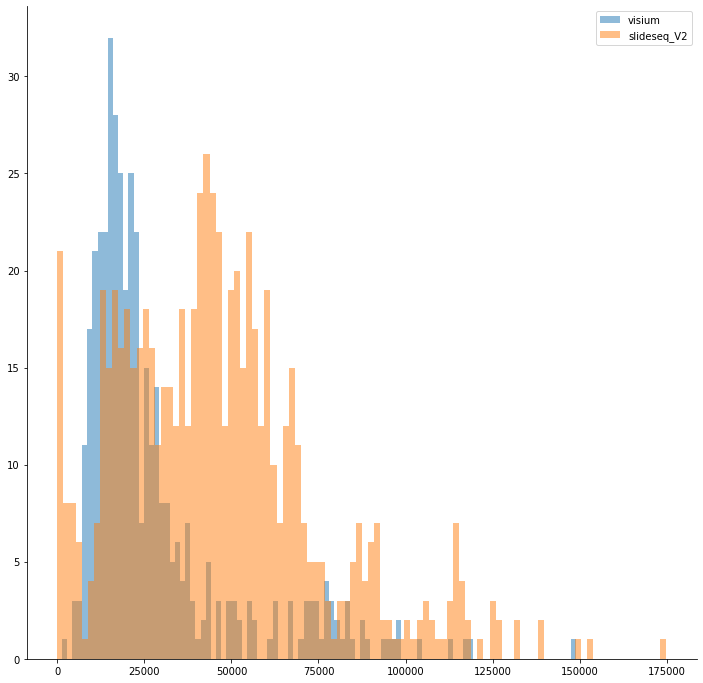

In [60]:
bins = numpy.linspace(0, 5, 1000)

pyplot.hist(hippocampus_coordinates['total_counts'], bins=100, alpha=0.5, label='visium')
pyplot.hist(coords100['total_counts'], bins=100, alpha=0.5, label='slideseq_V2')
pyplot.legend(loc='uapper right')
pyplot.show()

#make this a bit smoother

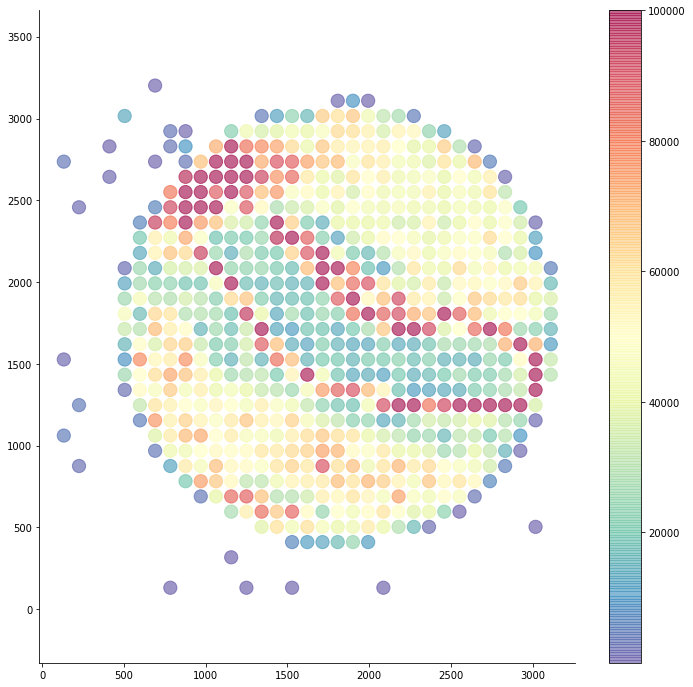

In [62]:
plt.figure(figsize = (12, 12))
plt.set_cmap('Spectral_r')
plt.scatter(coords100['x']*0.549, coords100['y']*0.549, c=coords100['total_counts'], s=175, alpha=0.6, vmax=100000);
plt.axis('equal');
plt.colorbar();
#plt.savefig("{}/100um_slideseq.svg".format("/broad/macosko/bstickels/data/slideseq/slideseq/slideseqv2/visium_data/figures"), dpi = 200)
plt.show();

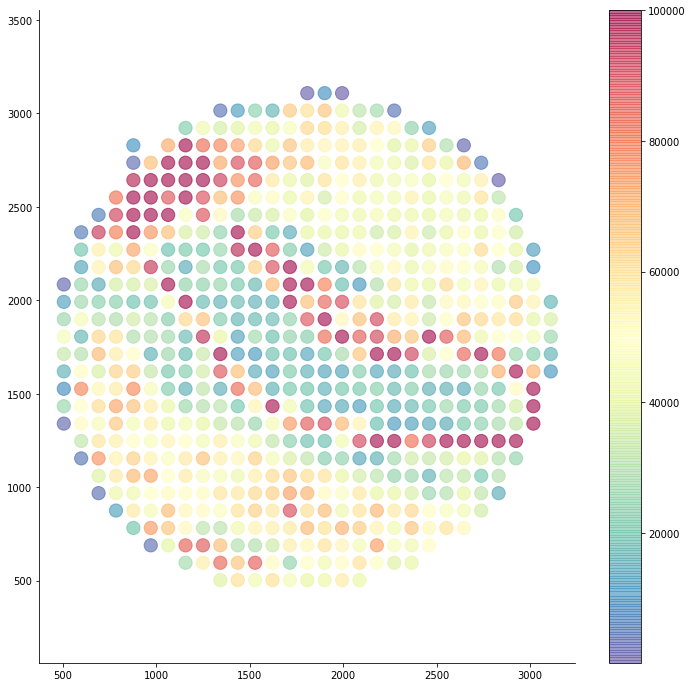

45026.5

In [63]:
coords100_cropped = coords100.query('(x-3200)*(x-3200)+(y-3300)*(y-3300)<=2500*2500')
plt.figure(figsize = (12, 12))
plt.set_cmap('Spectral_r')
plt.scatter(coords100_cropped['x']*0.549, coords100_cropped['y']*0.549, c=coords100_cropped['total_counts'], s=175, alpha=0.6, vmax=100000);
plt.axis('equal');
plt.colorbar();
#plt.savefig("{}/100um_slideseq.svg".format("/broad/macosko/bstickels/data/slideseq/slideseq/slideseqv2/visium_data/figures"), dpi = 200)
plt.show();
np.median(coords100_cropped['total_counts'])

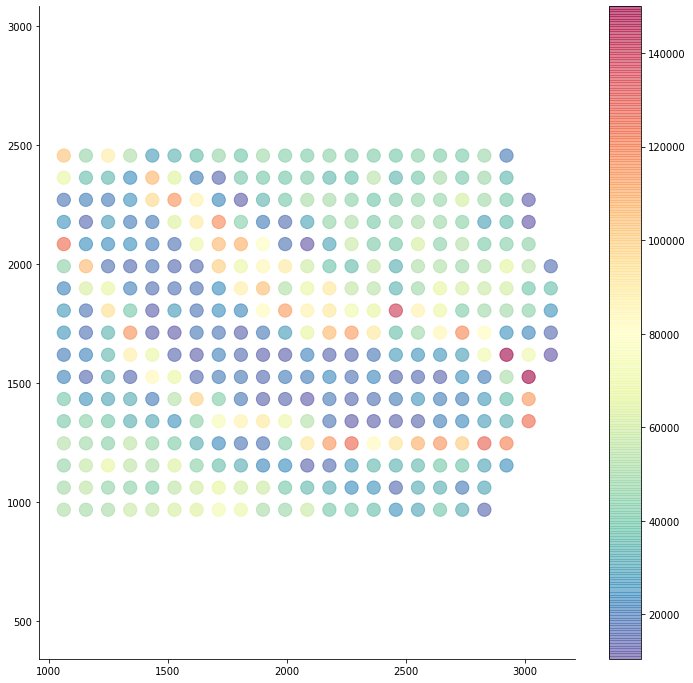

45026.5

In [64]:
coords100_cropped2 = coords100_cropped[(coords100_cropped['x']*0.549 > 1000) & (coords100_cropped['y']*0.549 > 900) & (coords100_cropped['y']*0.549 < 2500)]
plt.figure(figsize = (12, 12))
plt.set_cmap('Spectral_r')
plt.scatter(coords100_cropped2['x']*0.549, coords100_cropped2['y']*0.549, c=coords100_cropped2['total_counts'], s=175, alpha=0.6, vmax=150000);
plt.axis('equal');
plt.colorbar();
#plt.savefig("{}/100um_slideseq.svg".format("/broad/macosko/bstickels/data/slideseq/slideseq/slideseqv2/visium_data/figures"), dpi = 200)
plt.show();
np.median(coords100_cropped['total_counts'])

In [65]:
bins = numpy.linspace(0, 5, 1000)

plt.hist(hippocampus_coordinates['total_counts'], bins=50, alpha=0.3, label='visium')
plt.hist(coords100_cropped2['total_counts'], bins=50, alpha=0.3, label='slideseq_V2')
plt.legend(loc='upper right')
plt.axvline(coords100_cropped2['total_counts'].mean(), color='r', linestyle='dashed', linewidth=1, alpha=0.3)
plt.axvline(hippocampus_coordinates['total_counts'].mean(), color='b', linestyle='dashed', linewidth=1, alpha=0.3)
plt.savefig("/broad/macosko/bstickels/data/slideseq/slideseq/slideseqv2/visium_data/figures/histogram_counts.pdf", dpi = 200)
plt.show()








In [66]:
np.mean(coords100_cropped2["total_counts"])

45772.943396226416

In [67]:
np.mean(hippocampus_coordinates['total_counts'])

27952.085784313724